In [1]:
%matplotlib inline

In [2]:
#Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [3]:
#Files to load
city_path = "./Resources/city_data.csv"
ride_path = "./Resources/ride_data.csv"


In [4]:
#Turn into dataframes.

city_data_df = pd.read_csv(city_path)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df = pd.read_csv(ride_path)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Inspecting the city dataframe

In [6]:
#Null value inspection.
city_data_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Making sure driver_count has an integer dtype. 
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get value counts for each type. 
city_data_df.groupby("type").count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

### Inspect Ride Data DataFrame

In [11]:
#Get null values.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge DataFrames

In [14]:
pyber_data_df = pd.merge(ride_data_df, city_data_df,
                        how = "left", on = ["city", "city"])

pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


### Creating a bubble chart

#### 1. Bubble chart data

In [15]:
#Creating the Urban City DataFrame
urban_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#Creating the other DataFrames
suburban_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [18]:
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [19]:
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
#Get the number of rides for urban cities.
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
#Get the suburban and rural ride count.
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [22]:
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [24]:
#Get the average fare for each city by category.
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [27]:
#Get the average number of drivers for each city type. 
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [28]:
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

In [30]:
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [31]:
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

#### 2. Create Bubble Charts

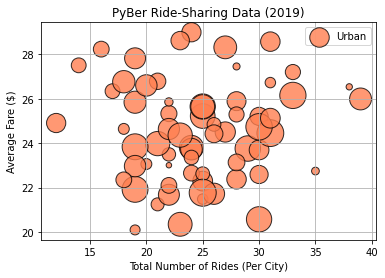

In [37]:
#Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = (10*urban_driver_count),
            c= "coral",
            edgecolor = "black",
            linewidth=1,
            alpha=0.8,
            label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add the legend.
plt.legend()

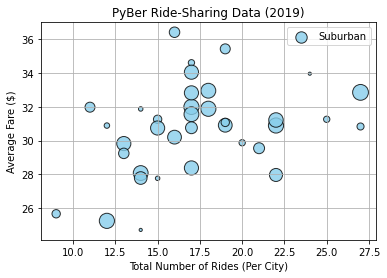

In [39]:
#Create the suburban scatter plot.

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10 * suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

plt.legend()
           

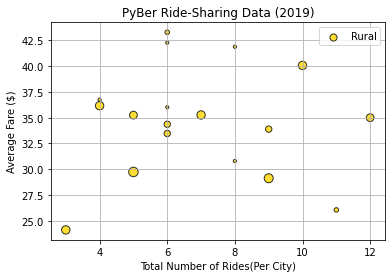

In [40]:
#Create the rural scatter plot.
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s= 10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)

plt.legend()


#### 3. Create a bubble chart for all cities.

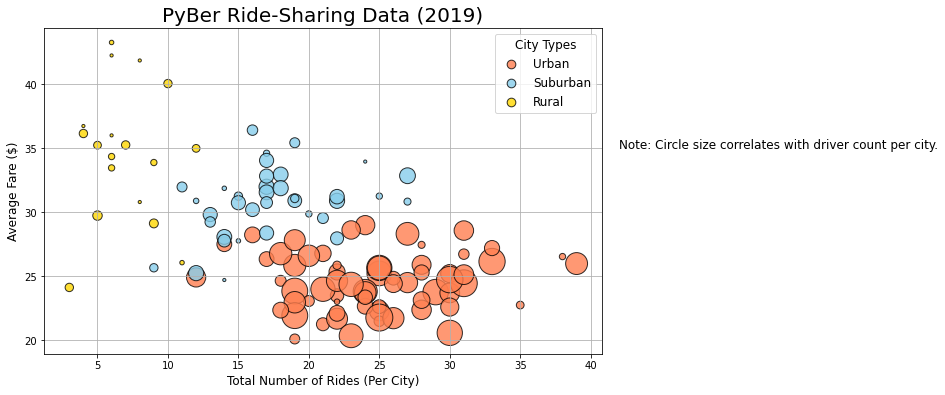

In [50]:
#Add the scatter charts for each type of city. 
plt.subplots(figsize =(10,6))

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = (10*urban_driver_count),
            c= "coral",
            edgecolor = "black",
            linewidth=1,
            alpha=0.8,
            label = "Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10 * suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label = "Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s= 10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Rural")

#Incorporate other graph properties.
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

#Create the legend.
lgnd = plt.legend(fontsize ="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

#Incorporate a note about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#Save the image.
plt.savefig("Analysis/Fig1.png")

#Show the plot.
plt.show()

### Getting summary statistics

In [77]:
#Get statistics for number of rides by city type
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [58]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [59]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [63]:
#Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [64]:
#Calculate the median.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [65]:
#Calculate the mode. 
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [66]:
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [67]:
rural_ride_count.mode()

0    6
Name: ride_id, dtype: int64

#### NumPy mean and median functions and SciPy mode function

In [69]:
import numpy as np
import scipy.stats as sts

In [70]:
#Calculate the measures of central tendency for the ride count by city type. 
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [72]:
#Calculate the measures for suburban and rural city types. 
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [73]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


#### Get statistics for the fare by city type

In [78]:
#Get the fares for the urban cities
urban_fares = urban_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [82]:
#Calculate the central tendency measures for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")



The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [83]:
#Calculate the central tendency measures for the average fare for the suburban cities.
suburban_fares = suburban_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")



The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [84]:
#Calculate the central tendency measures for the average fare for the rural cities.
rural_fares = rural_df["fare"]

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")


The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


#### 4. Get summary statistics for the number of drivers by city type

In [85]:
#Get the driver count data from the urban cities.
urban_drivers = urban_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [99]:
#Get summary statistics for each city type. 
mean_urban_drivers = np.mean(urban_drivers)
print(f"Mean for urban drivers: {mean_urban_drivers:.1f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"Median for urban drivers: {median_urban_drivers:.2f}")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"Mode for urban drivers: {mode_urban_drivers}.")

Mean for urban drivers: 36.7.
Median for urban drivers: 37.00
Mode for urban drivers: ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [98]:
suburban_drivers = suburban_df["driver_count"]

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"Mean for suburban drivers: {mean_suburban_drivers:.1f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"Median for suburban drivers: {median_suburban_drivers:.2f}")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"Mode for suburban drivers: {mode_suburban_drivers}.")

Mean for suburban drivers: 13.7.
Median for suburban drivers: 16.00
Mode for suburban drivers: ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [97]:
rural_drivers = rural_df["driver_count"]

mean_rural_drivers = np.mean(rural_drivers)
print(f"Mean for rural drivers: {mean_rural_drivers:.1f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"Median for rural drivers: {median_rural_drivers:.2f}")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"Mode for rural drivers: {mode_rural_drivers}.")

Mean for rural drivers: 4.3.
Median for rural drivers: 4.00
Mode for rural drivers: ModeResult(mode=array([1], dtype=int64), count=array([32])).


### Create box and whisker plots

#### Box and whisker plots for ride count data

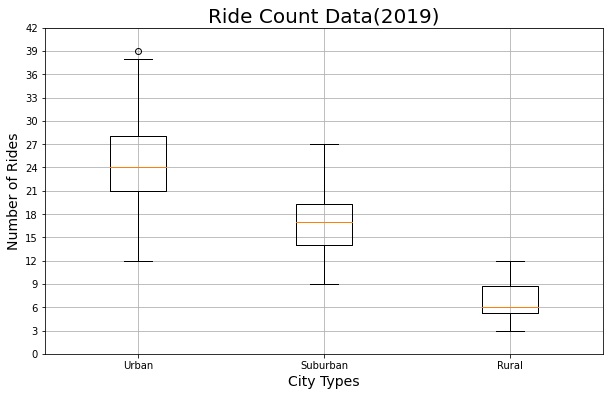

In [110]:
#Create a box and whisker plot for the cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

#Add the title, y-axis label and grid.
ax.set_title("Ride Count Data(2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)

ax.boxplot(ride_count_data, labels = x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid()

#Save the figure
plt.savefig("Analysis/Fig2.png")

plt.show()


In [111]:
#Get the city that matches the outlier value for urban rides (39).
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


#### Box and whisker plots for ride fare data

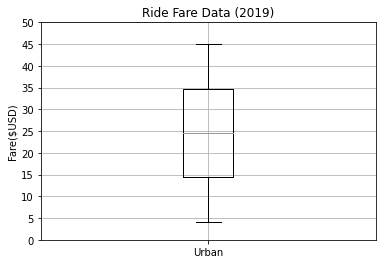

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [115]:
#Create a box and whisker plot for the urban fare data.

x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

#Add title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

urban_fares.describe()

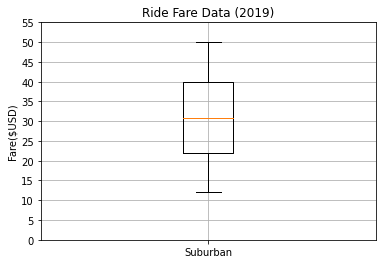

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [121]:
#Create a box and whisker plot for the suburban fare data.

x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)

#Add title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,56, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

suburban_fares.describe()

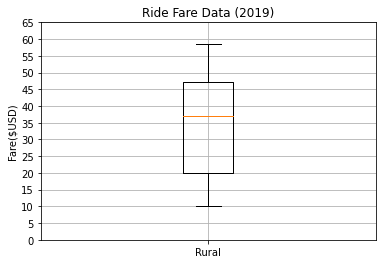

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [122]:
#Create a box and whisker plot for the rural fare data.

x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)

#Add title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,66, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

rural_fares.describe()

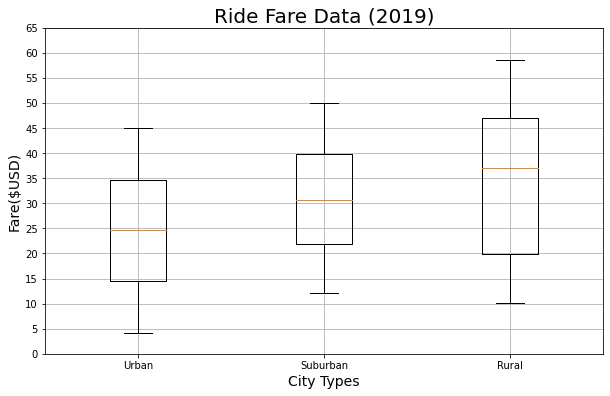

In [133]:
#Create a box and whisker plot for the fare data of all cities.

x_labels = ["Urban", "Suburban", "Rural"]
city_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize = (10,6))

#Add title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare($USD)", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)

ax.boxplot(city_fare_data, labels = x_labels)

ax.set_yticks(np.arange(0,66, step=5.0))

ax.grid()

#Save and show plot.

plt.savefig("Analysis/Fig3.png")

plt.show()


#### Box and whisker plots for driver count data

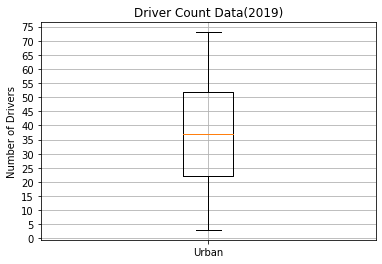

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [144]:
#Create a box and whisker plot for the urban drivers data.

x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

#Add title, y-axis label and grid.
ax.set_title("Driver Count Data(2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,80, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

urban_drivers.describe()

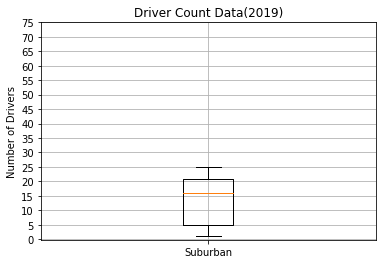

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [145]:
#Create a box and whisker plot for the suburban drivers data.

x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels = x_labels)

#Add title, y-axis label and grid.
ax.set_title("Driver Count Data(2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,80, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

suburban_drivers.describe()

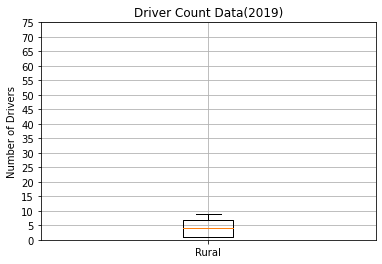

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [146]:
#Create a box and whisker plot for the rural drivers data.

x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels = x_labels)

#Add title, y-axis label and grid.
ax.set_title("Driver Count Data(2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,80, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")

rural_drivers.describe()

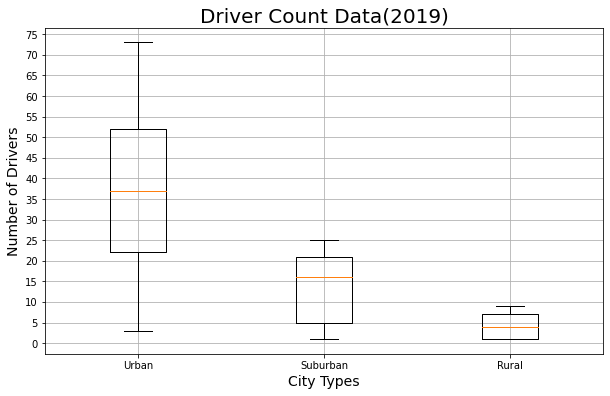

In [143]:
#Create the box and whisker plot for the cities driver count data.
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

x_labels = ["Urban", "Suburban", "Rural"]

fig, ax = plt.subplots(figsize =(10,6))

#Add the title, axis labels and grid.

ax.set_title("Driver Count Data(2019)", fontsize = 20)
ax.set_ylabel("Number of Drivers", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)

ax.boxplot(driver_count_data, labels = x_labels)

ax.set_yticks(np.arange(0, 80, step = 5.0))

ax.grid()

#Save and show figure.

plt.savefig("Analysis/Fig4.png")

plt.show()
